In [44]:
import numpy as np
import matplotlib.pyplot as plt

1. (a) How accurately do we need to know $\pi$ to calculate $\sqrt{\pi}$ correctly to four decimal places?

We can use the mean value theorem to approximate the error in $f(x) = \sqrt{x}$. Let $\Delta x$ be the error on our measurement of $\pi$ and $\bar{\pi} = \pi + \Delta x$. We fix the error on $f(\pi)$, $\Delta f$ to be 0.00001 (since we want $f(x)$ correct to four decimal places). We know that for each $x$ there exists a point $c\in (x, \bar{x})$ such that $\Delta f = f'(c) \Delta x = \frac{1}{2\sqrt{c}} \Delta x$. The number $\frac{1}{2\sqrt{c}}$ will have order of magnitude $10^{-1}$ for any number $c$ which is close to $\pi$ (or any $c<25$ for that matter). Thus the error $\Delta x$ at $x = \pi$ will be of the form $\frac{10^{-5}}{\alpha \cdot 10^{-1}}, \alpha \in [1,10)$ which has order of magnitude $10^{-5}$ as well. Thus we only need four decimal places.

   (b) Convert the binary number 11.111101 to base 10.
\begin{gather}
    (11.111101)_2 = 1\cdot 2^1 + 1\cdot 2^0 + 1\cdot 2^{-1} + 1\cdot 2^{-2} +1 \cdot 2^{-3} + 1\cdot 2^{-4} + 0\cdot 2^{-5} + 1 \cdot 2^{-6} \\
    = 3.953125
\end{gather}

2. The function $f(x) = (\sqrt{1 + x^2} - \sqrt{1 - x^2})^{-1}$ is singular at $x = 0$. Sure, but analytically it can be calculated arbitrarily close to zero, e.g. $x = 10^{-10}$.  What would be the most accurate way to do this?

We want to evaluate $f(x)$ as close as we can to zero. We can try do do this on a computer by plugging in succesively smaller values of x, but I suspect we won't be able to get very close before encountering an error. I've used a logarithmic scaling, computing values for $x = 10^{-n}$ with increasing $n$.

0 1 0.7071067811865475
1 0.1 99.99874996093632
2 0.01 9999.999987511092
3 0.001 999999.9999712444
4 0.0001 99999999.49752407
5 1e-05 9999999172.59636
6 1e-06 999911107320.27
7 1e-07 101204486008325.75
8 1e-08 9007199254740992.0
9 1e-09 inf


<ipython-input-42-dc7f673cdc3b>:2: RuntimeWarning: divide by zero encountered in double_scalars
  temp = (np.sqrt(1 + x**2) - (np.sqrt(1 - x**2)))**(-1)


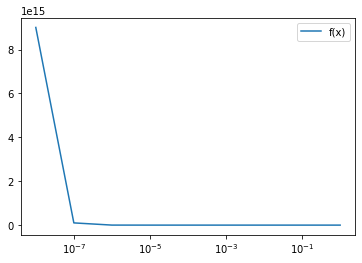

In [42]:
def F(x):
    temp = (np.sqrt(1 + x**2) - (np.sqrt(1 - x**2)))**(-1)
    return temp
xList = []
yList = []
def compute(N):
    n = 0
    while(n< N):
        x = 10**(-n)
        xList.append(x)
        yList.append(F(x))
        print(n,x,F(x))
        n = n+1
compute(10)
plt.plot(xList,yList,label='f(x)')
plt.xscale('log')
plt.legend()

As $x$ approaches 0, we see that the two terms in the denominator of $f$ are too close to each other that the computer cannot distinguish the difference from 0, so the closest to 0 we can evaluate the function is $x = 10^{-8}$. That's not fantastic... so let's see if we can rework $f$ into something we can easily Taylor expand...
$$ (\sqrt{1 + x^2} - \sqrt{1 - x^2})^{-1} = \frac{\sqrt{1 + x^2} + \sqrt{1 - x^2}}{2x^2}$$
What we've done here is just multiply by the conjugate of the denominator and simplify. The two guys in the numerator are clearly $C^\infty$ so let's take their respective taylor series:
$$ f_1(x) = {1 + x^2} = 1+ \frac{x^2}{2} - \frac{x^4}{8}+ ..., \quad f_2(x) = \sqrt{1 - x^2} = 1- \frac{x^2}{2} - \frac{x^4}{8} - ...$$
We note that when we add the two together in the numerator of $f$, the first nonconstant term is of quartic order. Simply put, near zero that term is so small we can ignore it so we obtain the following approximation near 0:
$$ f(x) = \frac{\sqrt{1 + x^2} + \sqrt{1 - x^2}}{2x^2} \approx \frac{2}{2x^2} = \frac{1}{x^2} $$
This is a very crispy approximation as one can see we'll be able to compute much closer to zero:

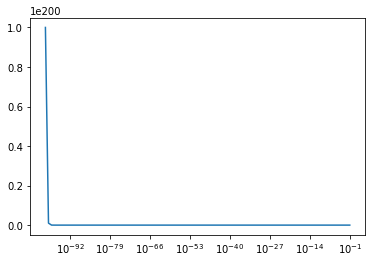

In [28]:
def newF(x):
    return x**(-2)
newxList = []
newyList = []
def computenewF(N):
    n = 0
    x = 1
    while(n< N):
        x = x/10
        newxList.append(x)
        newyList.append(newF(x))
        #print(n,x,newF(x))
        n = n+1
computenewF(100)
plt.plot(newxList,newyList)
plt.xscale('log')
#plt.yscale('log')

The reason this doesnt cause the divide by zero error is that the floating point number is allowed to adjust to the growing input since there is really only one significant digit - the leading one - and the rest are zero. 

3. Compute the root of the equation $f(x) = \sqrt{x}-e^{-x}$ using the secant method and Newton-Raphson. You need to make initial guesses. Try a few.

We know the intersection of the functions $g(x) = \sqrt{x}$ and $h(x) = e^{-x}$ lies in the interval $(0,1)$ just using their values at those points. Making some rudimentary initial calculations we see that:

In [4]:
def g(x):
    return x ** 0.5
def h(x):
    return np.exp(-x)
def f(x):
    return g(x) - h(x)
def MakeList(x):
    L = [x, f(x), g(x), h(x)]
    return L
K = ["x", "    f(x)      ", "      g(x)        ", "      h(x)     "]
print(K)
print(MakeList(0.4))
print(MakeList(0.5))

['x', '    f(x)      ', '      g(x)        ', '      h(x)     ']
[0.4, -0.037864514001963445, 0.6324555320336759, 0.6703200460356393]
[0.5, 0.10057612147391415, 0.7071067811865476, 0.6065306597126334]


You'll forgive me on the formatting of the table, I'm super busy this week. What we see here is that $f$ is negative at 0.4 and positive at 0.5 indicating that the interval (0.4,0.5) makes for a good starting spot for our interated methods. Fist we'll do the secant method:

0.4273507224752382 0.0014859174679314746
0.42631792779501737 2.1531295195886813e-05
0.42630297086119506 3.119096863013482e-07
0.4263027541917349 4.5184126440389605e-09
0.4263027510529997 6.54549747736155e-11
0.4263027510075311 9.482414853323462e-13
0.4263027510068724 1.3655743202889425e-14
0.42630275100686293 3.3306690738754696e-16
0.4263027510068627 -1.1102230246251565e-16
0.42630275100686277 1.1102230246251565e-16
0.42630275100686277 1.1102230246251565e-16
0.42630275100686277 1.1102230246251565e-16
0.42630275100686277 1.1102230246251565e-16
0.42630275100686277 1.1102230246251565e-16


Text(0, 0.5, 'Error')

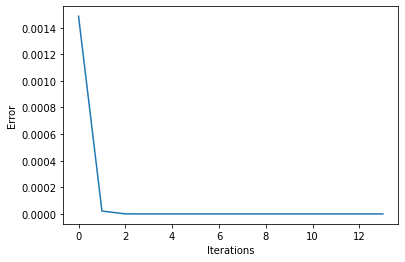

In [33]:
def newGuess(t,x,y):
    s = x + ((y - x)/(f(y) - f(x)))*(t - f(x))
    return s
L = []
def iterate(N):
    x = 0.4
    y = 0.5
    n = 1
    while (n < N):
        z = newGuess(0,x,y)
        s = f(z)
        if (s >= 0):
            y = z
        else:
            x = z
        L.append(s)
        print(z,s)
        n = n+1
iterate(15)
t = np.arange(14)
plt.plot(t,L)
plt.xlabel('Iterations')
plt.ylabel('Error')

We see here that the process stops returning new values at around 10 interations, giving us a value of 0.42630275100686277, meaning that we can certify that the root lies near $x = 0.42630275100686277$ with a good degree of certainty. One also sees, from the error plot that after the fifth iteration, we are less than $10^{-10}$ away from the exact answer (0 in this case). Next we'll try the Newton-Raphson method, and we'll use as a guess 0.45, even though we now know the root to lie closer to 0.42, just so the comparison with the secant method is more interesting.

0.4259995501255417 -0.00043022569071127226
0.4263027007439085 -7.130859980275517e-08
0.4263027510068613 -1.9984014443252818e-15
0.4263027510068627 -1.1102230246251565e-16
0.42630275100686277 1.1102230246251565e-16
0.4263027510068627 -1.1102230246251565e-16
0.42630275100686277 1.1102230246251565e-16
0.4263027510068627 -1.1102230246251565e-16
0.42630275100686277 1.1102230246251565e-16


Text(0.5, 0, 'Iterations')

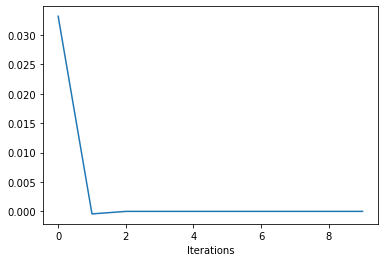

In [34]:
#define the derivative of f
def ff(x):
    return 0.5*(x**(-0.5)) + np.exp(-x)
initialGuess = 0.45
def newGuessNR(x):
    return x - f(x)/ff(x)
K = [f(0.45)]
def iterateNR(N):
    guess = initialGuess
    n = 1
    while (n < N):
        z = newGuessNR(guess)
        s = f(z)
        print(z,s)
        K.append(s)
        guess = z
        n = n+1
iterateNR(10)
t = np.arange(10)
plt.plot(t,K)
plt.xlabel('Iterations')

Wow! Just as advertised, the newton Raphson method gets to an error of less than $10^{-7}$ after two iterations. The graphs won't tell us much in either case as both methods converge so quickly

4.  For the problem above consider the two fixed-point iterations: $x_{n+1}=e^{-2x_n}$ and $x_{n+1}=-1/2 \ln(x_n)$. Code  these up and compare their performance to the methods of question 3 above. Explain  the behaviour in terms of the relevant theorem on convergence.

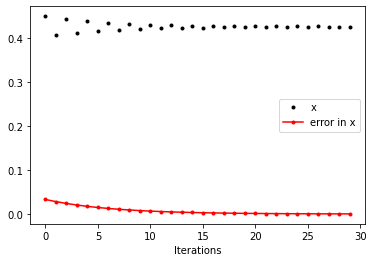

In [35]:
def Phi(x):
    return np.exp(-2*x)
L1 = []
L2 = []
initialGuess = 0.45
def iterateFP1(N):
    n=0
    g = initialGuess
    while(n<N):
        L1.append(g)
        L2.append(np.abs(f(g)))
        ## print(g,f(g))
        g = Phi(g)
        n = n+1
iterateFP1(30)
t = np.arange(30)
s=t
plt.plot(t,L1, 'ok', marker=".", color='black', label='x')
plt.plot(s,L2, marker=".", color='red', label = 'error in x')
plt.xlabel('Iterations')
plt.legend()

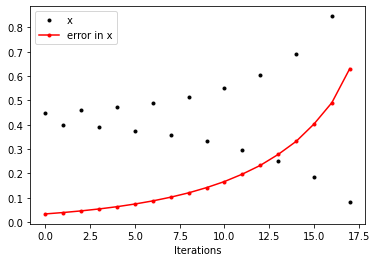

In [36]:
def Psi(x):
    return -0.5*np.log(x)
L3 = []
L4 = []
initialGuess = 0.45
def iterateFP2(N):
    n=0
    g = initialGuess
    while(n<N):
        L3.append(g)
        L4.append(np.abs(f(g)))
        ## print(g,f(g))
        g = Psi(g)
        n = n+1
iterateFP2(18)
t = np.arange(18)
plt.plot(t,L3, 'ok', marker=".", color='black', label='x')
plt.plot(t,L4, marker=".", color='red', label = "error in x")
plt.xlabel('Iterations')
plt.legend()

The first fixed point iteration $\phi(x) = e^{-2x}$ converges to the correct value of $x^\star$, but does so extremely slowly compared to Newton-Raphson, or even the secant method. The second fixed point iteration $\psi(x) = -1/2\log(x)$ doesn't converge. In fact on the 20th iteration we have to compute the log of a negative number, and since numerical python can't do complex analysis (as far as I know) we get an error message. One sees by the graph that the error baloons pretty quickly. Iterating with $\psi$ doesn't converge since $\psi$ doesn't satisfy the theorem which states that to guarantee convergence, in a neighbourhood of $x^\star$ the derivative of $\psi$ must be bounded, which it is not: $|\psi'(x)| = \frac{1}{2x}$ is greater than 1 in any neighbourhood of $x^\star \approx 0.4263$. On the other hand, $\phi(x)$ does satisfy this theorem, so not only do the iterations converge, but the root is unique in the neighbourhood of $x^\star$.

5. Consider the fixed point iteration:
$$ x_{n+1} = \frac{\lambda x_n +1 - \sin{x_n}}{1 + \lambda}$$
Show that, if it converges, it converges to something that is independent of $\lambda$. If true, that means that we can choose any $\lambda$ and, further, that it could potentially be used to speed up convergence. Explain how you would do this. What would be the value of $\lambda$ yielding the fastest convergence. 

We can show that the convergence is independent of $\lambda$: For large $n$, we can assume $x_{n+1} \approx x_{n}$ (sorry analysts) which when plugged into the recursion formula gives:
$$ x +\lambda x = \lambda x+ 1 - \sin x \iff x+\sin x = 1 \implies x\approx 0.511$$
This value can be found using one of the above methods. More importantly, we note that after assuming that for large $n, x_{n+1} = x_{n}$, the equation which determines $x$, the fixed point, is independent of $\lambda$. 

Text(0.5, 0, 'Iterations')

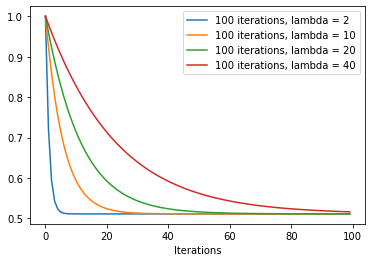

In [37]:
def Xi(x,L): # using L to denote the parameter lambda
    return (L*x + 1 - np.sin(x))/(1+L)
def iterateFP3(N,L):
    x = 1
    n = 0
    List = []
    t = np.arange(N)
    while(n<N):
        List.append(x)
        ## print(n,x)
        x = Xi(x,L)
        n = n+1
    plt.plot(t,List, label='100 iterations, lambda = '+str(L))
iterateFP3(100,2)
iterateFP3(100,10)
iterateFP3(100,20)
iterateFP3(100,40) #I think these examples illustrate the effect of lambda on the speed of convergence
plt.legend()
plt.xlabel('Iterations')

From the above computations one clearly sees that minimizing lambda also minimized the speed of convergence for $\lambda>1$. However, we can't have $\lambda=-1$ for obvious reasons, and in fact a small enough $\lambda$ gives osscilation. To minimize the value of $\lambda$ for which the sequence $x_n$ converges, we want to minimize $\lambda$ such that $|\xi'(x)|<1$
$$ \xi'(x) = \frac{\cos(x) - 1}{1+\lambda}. $$
Assuming $|\xi'(x)|\leq 1$ in a neigbourhood of $x\approx 0.511$, we can rearrange to obtain $1+|\lambda| \geq |1+\lambda|\geq|\cos(x)-1|$. The minimal $\lambda$ here is where $\lambda = \cos\lambda$, which is about $\approx 0.739$.

Text(0.5, 0, 'Iterations')

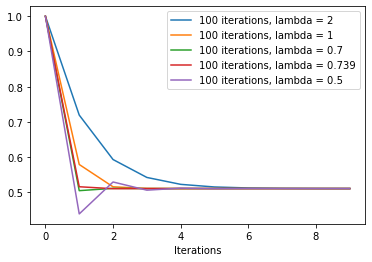

In [38]:
iterateFP3(10,2)
iterateFP3(10,1)
iterateFP3(10,0.7)
iterateFP3(10,0.739)
iterateFP3(10,0.5)
plt.legend()
plt.xlabel('Iterations')